In [1]:
import pandas as pd

In [2]:
# Specify the path to your CSV file
file_path = 'C:\\Users\\abdal\\cleanedd.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Applicant ID                             1522 non-null   int64  
 1   LEVEL                                    1522 non-null   object 
 2   Nationality                              1515 non-null   object 
 3   Father Income Document                   1516 non-null   object 
 4   Mother Income Document                   1514 non-null   object 
 5   Marital Status                           1522 non-null   object 
 6   Plan to Reside                           1522 non-null   object 
 7   Father Citizenship                       1522 non-null   object 
 8   Father Birthdate                         1522 non-null   object 
 9   Father Status                            1522 non-null   object 
 10  Mother Status                            1509 no

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# One-hot encode categorical variables
categorical_features = [ 'LEVEL', 'Nationality', 'Marital Status', 'Plan to Reside', 'Father Citizenship', 'Father Status', 'Mother Status', 'Travel Records', 'Car_Models', 'FAID_Record_owner']
encoder = OneHotEncoder(sparse_output=False)
encoded_features = pd.DataFrame(encoder.fit_transform(df[categorical_features]))
encoded_features.columns = encoder.get_feature_names_out(categorical_features)

# Combine encoded features with numerical features
# Combine encoded features with numerical features
numerical_features = ['Father Income Document', 'Mother Income Document', 'Number of Siblings @ AUB', 'Number of Dependents',
                      'Number of Properties', 'Total Estimated Value', 'Total Area', 'Total Tuition for siblings', 'Total Financial Assistance for siblings', 'Financial Assistant', 'Father_Total_Benefits', 'Mother_Total_Benefits', 'Number_of_Cars', 'Applicant Annual Income']
X = pd.concat([df[numerical_features], encoded_features], axis=1)

# Target variable
y = df['Need']

In [5]:
from sklearn.model_selection import train_test_split

# Convert non-numeric columns to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Fill missing values with column means
df.fillna(df.mean(), inplace=True)

# Remove extra samples from X
X = X.iloc[:len(y), :]

# Ensure X and y have the same number of samples
assert X.shape[0] == y.shape[0]

# Split into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
# Ensure X_train is fully numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Check for NaN or infinite values
mask = np.isnan(X_train) | np.isinf(X_train) | (X_train > np.finfo(np.float64).max)

# Replace invalid values with 0
X_train[mask] = 0 

# Fit logistic regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


--- Linear Regression ---
R² Score: -1098270459861493248.00
Mean Absolute Error (MAE): 1205678619.20
Mean Squared Error (MSE): 309629770491467923456.00
Root Mean Squared Error (RMSE): 17596299909.11
--------------------------------------------------
--- Random Forest ---
R² Score: 0.34
Mean Absolute Error (MAE): 9.37
Mean Squared Error (MSE): 185.18
Root Mean Squared Error (RMSE): 13.61
--------------------------------------------------
--- Gradient Boosting ---
R² Score: 0.34
Mean Absolute Error (MAE): 9.85
Mean Squared Error (MSE): 184.68
Root Mean Squared Error (RMSE): 13.59
--------------------------------------------------


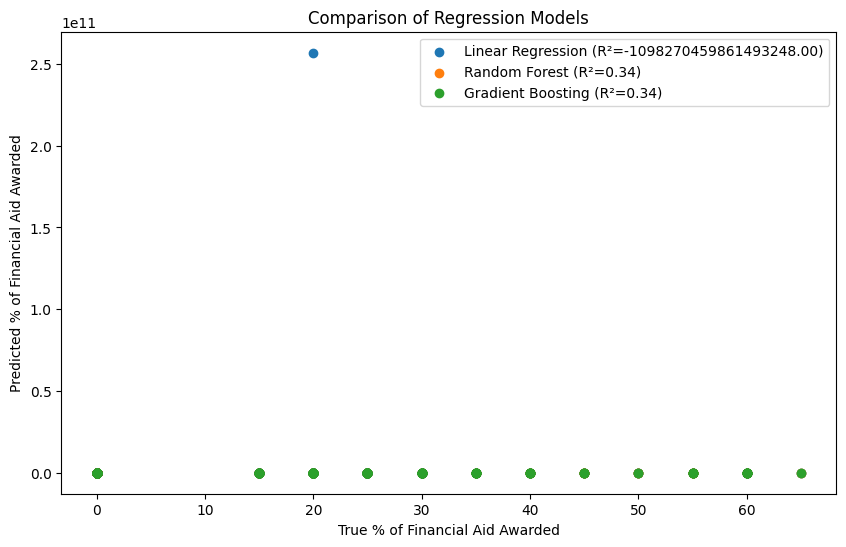

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib
# Ensure X_train is fully numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Replace NaNs or infinite values with 0
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(0, inplace=True)
# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
}

# Placeholder to store Gradient Boosting model
gradient_model = None

# Fit models and evaluate performance
plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Save gradient model for later
    if model_name == "Gradient Boosting":
        gradient_model = model

    # Predictions
    y_pred = model.predict(X_valid)

    # Metrics
    r2 = r2_score(y_valid, y_pred)
    mse = mean_squared_error(y_valid, y_pred)
    mae = mean_absolute_error(y_valid, y_pred)
    rmse = np.sqrt(mse)

    # Print results
    print(f"--- {model_name} ---")
    print(f"R² Score: {r2:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("-" * 50)

    # Scatter plot
    plt.scatter(y_valid, y_pred, label=f'{model_name} (R²={r2:.2f})')

# Save only the Gradient Boosting model
import joblib
joblib.dump(gradient_model, "gradient_boosting_model.pkl")
joblib.dump(encoder, "onehot_encoder.pkl")
# Final plot tweaks
plt.xlabel('True % of Financial Aid Awarded')
plt.ylabel('Predicted % of Financial Aid Awarded')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()


--- Linear Regression ---
R² Score: 0.14
Mean Absolute Error (MAE): 12.98
Mean Squared Error (MSE): 268.77
Root Mean Squared Error (RMSE): 16.39
--------------------------------------------------
--- Random Forest ---
R² Score: 0.22
Mean Absolute Error (MAE): 11.28
Mean Squared Error (MSE): 241.59
Root Mean Squared Error (RMSE): 15.54
--------------------------------------------------
--- Gradient Boosting ---
R² Score: 0.28
Mean Absolute Error (MAE): 11.55
Mean Squared Error (MSE): 225.39
Root Mean Squared Error (RMSE): 15.01
--------------------------------------------------


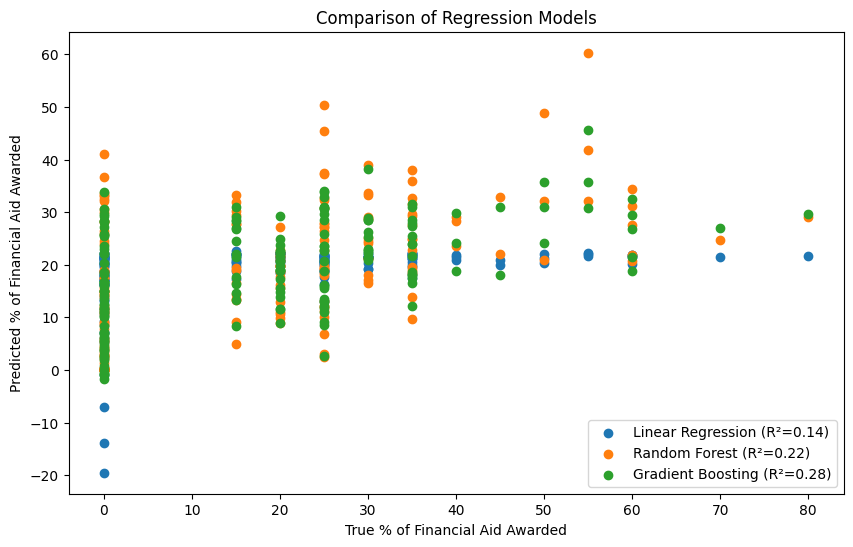

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Ensure X_train is fully numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Replace NaNs or infinite values with 0
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(0, inplace=True)

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Regression Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
}

# Fit models and evaluate performance
plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_valid)

    # Metrics
    r2 = r2_score(y_valid, y_pred)
    mse = mean_squared_error(y_valid, y_pred)
    mae = mean_absolute_error(y_valid, y_pred)
    rmse = np.sqrt(mse)

    # Print results
    print(f"--- {model_name} ---")
    print(f"R² Score: {r2:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("-" * 50)

    # Scatter plot of true vs predicted values
    plt.scatter(y_valid, y_pred, label=f'{model_name} (R²={r2:.2f})')
    
import joblib

# Save model and encoder
joblib.dump(model, "gradient_boosting_model.pkl")
joblib.dump(encoder, "onehot_encoder.pkl")

# Plot
plt.xlabel('True % of Financial Aid Awarded')
plt.ylabel('Predicted % of Financial Aid Awarded')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()

